In [33]:
#importing required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.figure as mfig
import scipy.stats

In [2]:
# loading the data in pandas dataframe
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head(11)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


**Q.1 -- Is there a significant differnce in median value of houses(MEDV) bounded by Charles river(CHAS) or not? (T-test for independent samples)**

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

- One independent, categorical variable with two levels or group (In our case it's "CHAS").
- One dependent continuous variable (In our case it's "MEDV").
- Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
- The dependent variable must follow a normal distribution
- Assumption of homogeneity of variance.

## Stating the hypothesis
𝐻0:µ1=µ2  ("MEDV" is not bounded by "CHAS") - null hypothesis
𝐻1:µ1≠µ2  ("MEDV" is bounded by "CHAS") - alternative hypothesis

### Plotting a histogram for the Charles river variable(CHAS)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

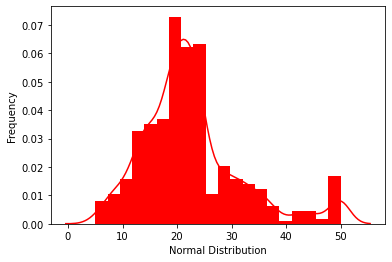

In [3]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

### Using the T-test for independent samples

In [4]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

since α = 0.05, the p-value is less than α so we have statistically significant proof to reject our null hypothesis.

### Q.2 -- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [5]:
boston_df['AGE'].mean()

68.57490118577076

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable, we will create a new column for this newly assigned group our categories will be teachers that are:

- 60 percent or less
- Between 60 and 80 percent
- 80 percent and more

In [6]:
boston_df.loc[(boston_df['AGE'] <= 60), 'proportion_group'] = '60 percent or less'
boston_df.loc[(boston_df['AGE'] > 60)&(boston_df['AGE'] < 80), 'proportion_group'] = 'Between 60 and 80 percent'
boston_df.loc[(boston_df['AGE'] >= 80), 'proportion_group'] = '80 percent and more'

- 𝐻0:µ1=µ2=µ3  (the three population means are equal)  <== Null hypothesis
- 𝐻1: At least one of the means differ                 <== Alternate hypothesis


In [17]:
#scipy.stats.levene(boston_df[boston_df['proportion_group'] == '60 percent or less']['MEDV'],
#boston_df[boston_df['proportion_group'] == 'Between 60 and 80 percent']['MEDV'],
#boston_df[boston_df['proportion_group'] == '80 percent and more']['MEDV'], center = 'mean')

In [18]:
# First, separate the three samples (one for each job category) into a variable each.
sixty_lower = boston_df[boston_df['proportion_group'] == '60 percent or less']['MEDV']
sixty_eighty = boston_df[boston_df['proportion_group'] == 'Between 60 and 80 percent']['MEDV']                       
eighty_higher = boston_df[boston_df['proportion_group'] == '80 percent and more']['MEDV']

In [21]:
# Now let's run a one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(sixty_lower,sixty_eighty,eighty_higher)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 37.620875000209224, P-Value: 5.940496768844388e-16


**Conclusion**: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

## For the "Median value of owner-occupied homes" provide a boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f30506301d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3050630c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3050627b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3050638750>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3050638c90>],
 'means': []}

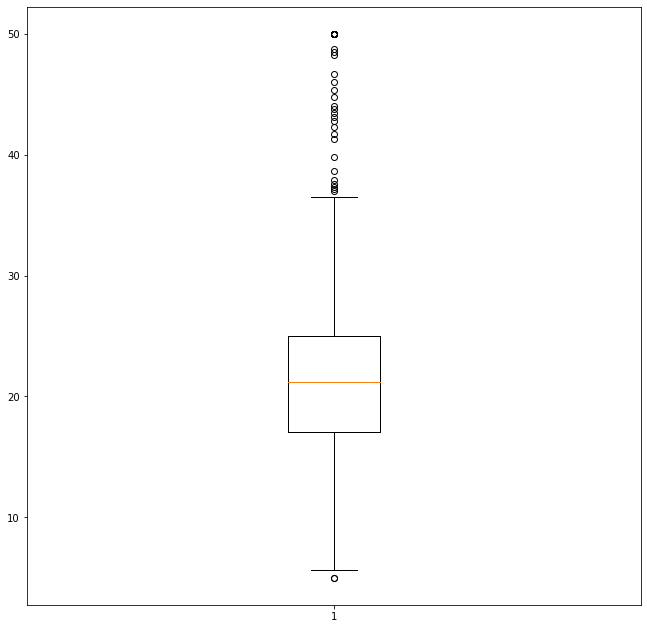

In [34]:
fig = plt.figure(figsize =(11, 11))
plt.boxplot(boston_df['MEDV'])

## Provide a boxplot for the MEDV variable vs the AGE variable

In [38]:
sub_df = boston_df[['MEDV','proportion_group']]
sub_df.head()

,MEDV,proportion_group
0,24.0,Between 60 and 80 percent
1,21.6,Between 60 and 80 percent
2,34.7,Between 60 and 80 percent
3,33.4,60 percent or less
4,36.2,60 percent or less


In [42]:
melted_df=pd.melt(sub_df,id_vars=['proportion_group'],value_vars=['MEDV'],var_name='AGE')
melted_df

,proportion_group,AGE,value
0,Between 60 and 80 percent,MEDV,24.0
1,Between 60 and 80 percent,MEDV,21.6
2,Between 60 and 80 percent,MEDV,34.7
3,60 percent or less,MEDV,33.4
4,60 percent or less,MEDV,36.2
...,...,...,...
501,Between 60 and 80 percent,MEDV,22.4
502,Between 60 and 80 percent,MEDV,20.6
503,80 percent and more,MEDV,23.9
504,80 percent and more,MEDV,22.0


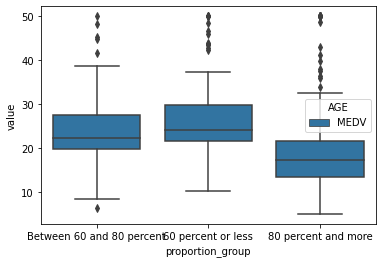

In [43]:
sns.boxplot(x='proportion_group',y='value',data=melted_df,hue='AGE')

### Q.3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot

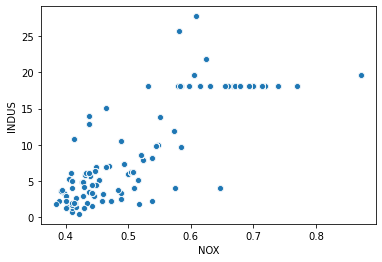

In [45]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

- H0 (Null hypothesis)      --> There is no relation between NOX and INDIS varibles.
- H1 (Alternate hypothesis) --> There is some kind of relation between NOX and INDIS.

In [46]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion**: Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### Q.4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

- H0 (Null hypothesis)      --> There is no relation between DIS and MEDV varibles.
- H1 (Alternate hypothesis) --> There is some kind of relation between MEDV and DIS.

In [47]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.21e-08
Time:                        09:12:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient(coef) 1.0916 implies that, when comparing two examples whose "DIS" differ by one unit, the example whose "DIS" is higher will, on average, have 1.0916 units higher "MEDV"